In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
nodes = pandas.read_csv("../nodes_official.csv", parse_dates=['Confirmed On', 'Recovered On', 'Deceased On', 'Discharged On'])
nodes

,ID,Case,Age,Gender,Nationality,Condition,Transmission,Cluster,Confirmed On,Recovered On,Discharged On,Deceased On
0,MAV00001,MAV00001,49,Female,Turkey,Stable,Local Transmission,NaN,2020-03-07,2020-03-21,2020-03-23,NaT
1,MAV00002,MAV00002,56,Male,South Africa,Stable,Local Transmission,NaN,2020-03-07,2020-03-23,2020-03-23,NaT
2,MAV00003,MAV00003,69,Male,Italy,Stable,Imported,NaN,2020-03-08,2020-03-20,2020-03-31,NaT
3,MAV00004,MAV00004,67,Female,Italy,Stable,Imported,NaN,2020-03-08,2020-03-20,2020-03-31,NaT
4,MAV00005,MAV00005,27,Female,Germany,Stable,Imported,NaN,2020-03-09,2020-03-23,2020-03-29,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
23833,MAV23834,MAV23834,24,Male,Maldives,Stable,Cluster of Cases,RROSE,2021-03-28,NaT,NaT,NaT
23834,MAV23835,MAV23835,8,Female,Maldives,Stable,Cluster of Cases,NaN,2021-03-30,NaT,NaT,NaT
23835,MAV23836,MAV23836,67,Female,Maldives,Stable,Cluster of Cases,NaN,2021-03-29,NaT,NaT,NaT
23836,MAV23837,MAV23837,10,Male,Maldives,Stable,Cluster of Cases,NaN,2021-03-29,NaT,NaT,NaT


In [10]:
time_series = nodes["Confirmed On"].value_counts().sort_index()
ts = pandas.DataFrame(time_series)

In [35]:
ts['rav'] = ts["Confirmed On"].rolling(7).mean().shift(-3)

<AxesSubplot:>

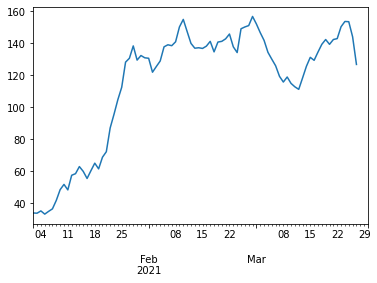

In [36]:
rv = ts[ts.index > "2021-01-01"]["rav"]

rv.plot()

In [103]:

## load the raw tweet shit


bd = pandas.DataFrame()

current_record = None
with open("tweet_raw.txt", "r") as f:
    for line in f:
        if not line.strip():
            continue

        if line.lower().startswith("as of"):
            if current_record:
                bd = bd.append(current_record, ignore_index=True)
            current_record = dict()
            t = line.replace("As of ", "").strip()
            t = pandas.to_datetime(t, format="%d.%m.%Y, %I:%M %p")
            current_record["date"] = t
            continue

        k, v = line.strip().split(":", 2)
        if k.strip().endswith("other purposes"):
            k = "Industrial islands"

        current_record[k.strip()] = v.strip()


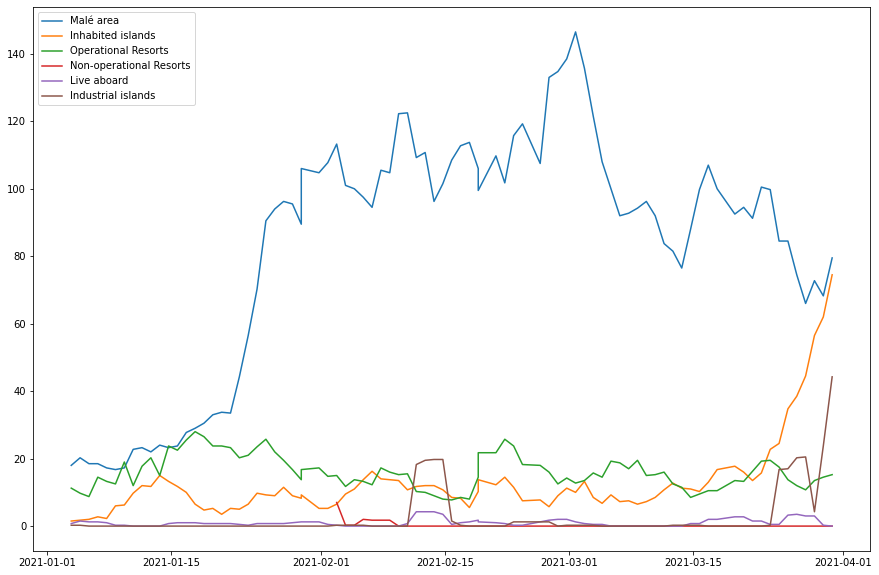

In [126]:
plt.figure(figsize=[15,10])

for x in ["Malé area", "Inhabited islands", "Operational Resorts", "Non-operational Resorts", "Live aboard", "Industrial islands"]: #, "Islands under development"]:
    ma = bd[[x, "date"]].sort_values(["date",], axis=0, ignore_index=True)
    ma[f"rav"] = ma[x].rolling(4).mean().shift(-2)
    ma = ma.set_index("date")
    plt.plot(ma["rav"], label=x)
    plt.legend(loc=2)

bd.to_csv("tweet_raw.csv")